# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание данных

* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sales** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

import seaborn as sns
import scipy.stats as st

## Откроем файл с данными и изучим общую информацию

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(40)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Унифицируем написание названий столбцов - приводим все к нижнему регистру.

In [5]:
df.columns = df.columns.str.lower()

Сразу же приведем к нижнему регистру содержимое в столбцах с текстом

In [6]:
list_to_lower = ['name', 'platform', 'genre', 'rating']
for column in list_to_lower:
    df[column] = df[column].str.lower()

Посмотрим на результат:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Согласно вводным данным, в столбце 'user_score' также содержится абревиатура "tbd"  - To be declared, что означает "Будет объявлено позже". Для нас это тоже самое, что и NaN. Убедимся в наличии tbd и заменим tbd на NaN. 

In [9]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

Сразу же приобразуем данные в этом столбце к нужному типу:
    

In [11]:
df['user_score'] = df['user_score'].astype('float')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Проверим столбец 'name' на пропуски:

In [13]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Приведенные строки практически не содержат данных и для нас бесполезны. Удалим их.

In [14]:
df = df.dropna(subset = ['name'])

В столбце 'platform' пропусков нет, что видно из данных df.info(). В столбце 'year_of_release' пропусков мало - избавимся от их, поскольку заменить их синтетическими данными мы не можем.


In [15]:
df = df.dropna(subset = ['year_of_release'])

Сразу приведем его к нужному типу:

In [16]:
df['year_of_release'] = df['year_of_release'].astype('int')


Посмотрим на пропуски в 'critic_score':

In [17]:
df[df['critic_score'].isnull()].head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,gb,1999,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,snes,1990,platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,ds,2006,role-playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,gb,1989,platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,nes,1988,platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Видим, что в столбцах с рейтингом сплошные пропущенные значения, ведь заполнены они примерно лишь на половину:
* 8  столбец  critic_score     8137 - записей
* 9  столбец  user_score       7590 - записей
* 10 столбец  rating           9949 - записей
<br>

* Причиной отсутствия рейтинга может быть малопопулярность игры (в т.ч. в силу того, что игра очень старая), т.к. для того, чтобы получить рейтинг - игра должна заинтересовать игровые издания / рейтинговые организации / игровую общественность. Часто - материально, что, например, инди студии сделать не могут. 
* Также, отсутствие рейтинга может быть обусловлено тем, что игра представляет из себя сервис. Такие игры оценивать <a href="https://www.ixbt.com/live/games/pochemu-igrovye-zhurnalisty-perestali-vystavlyat-ocenki-igram.html">затруднительно</a>, поскольку они постоянно меняются и рейтинг актуален лишь на короткий период действия того или иного обновления.



Заполним пропуски в critic_score и user_score медианными значениями. Т.к. если мы оставим пропуски - в дальнейшем они будут мешать нам проверять наши гипотезы.

In [18]:
df['critic_score'].fillna(df['critic_score'].median(), inplace=True)
df['user_score'].fillna(df['user_score'].median(), inplace=True)

Посмотрим на уникальные значения столбца 'rating':

In [19]:
df['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

* В столбце 'rating' значения **'K-A'** и **'E'** — тождественны, поскольку рейтинг **«K-A»** («Kids to Adults») затем был <a href="https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board">заменен</a> рейтингом **'E'** - Everyone (E) - Игры, которые годны для всех возрастов. Поэтому, во избежание неявного дублирования, заменим все **'K-A'** на **'E'**.
* Также, рейтинг **'EC'**  - Early Childhood - игры для дошкольников - больше не используется. Заменим и **'EC'** на **'E'**

In [20]:
df.loc[df['rating'] =='k-a','rating'] = 'e'
df.loc[df['rating'] =='ec','rating'] = 'e'

Рейтинг 'rp' - Rating Pending - применяется тогда, когда игре еще не присвоен окончательный рейтинг от ESRB. Заменим NaN в столбце 'rating' на 'rp'

In [21]:
df.loc[df.loc[:,'rating'].isnull(),'rating'] = 'rp'

In [22]:
df['rating'].value_counts()

rp      6677
e       3932
t       2905
m       1536
e10+    1393
ao         1
Name: rating, dtype: int64

Проверим наличие дубликатов:


In [23]:
df.duplicated().sum()


0

Создадим столбец, отвечающий за продажи во всех регионах:

In [24]:
df['total_sales'] = df.apply(lambda row: sum(row[['na_sales','eu_sales','jp_sales','other_sales']]),axis =1)

In [25]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,71.0,7.5,rp,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,71.0,7.5,rp,31.38


## Проведем исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы.

In [26]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

Сгруппируем данные и построим график начиная с 1994 года, т.к. до этого игр выпускалось слишком мало.

In [27]:
game_by_years = df.groupby('year_of_release').agg({'name':'count'})

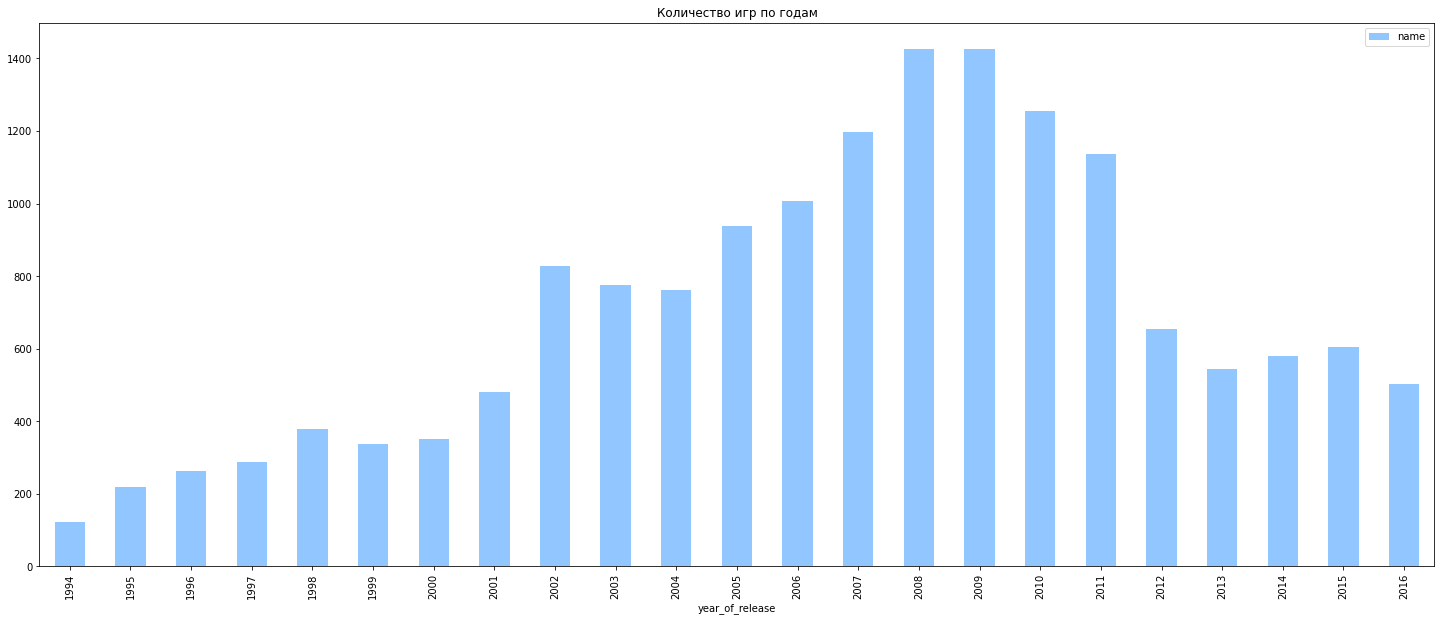

In [28]:
with plt.style.context('seaborn-pastel'):
    game_by_years.loc[1994:].plot(y = 'name', kind= 'bar', figsize = (25,10))
    plt.title('Количество игр по годам')

Больше всего игр выпускалось с 2005 по 2011 год.

### Посмотрим, как менялись продажи по платформам.

Получим первую 10-ку популярных платформ:

In [29]:
platforms10 = df.groupby('platform').agg({'total_sales':'sum'}).sort_values(by = 'total_sales', ascending = False)[:10].index

In [30]:
platforms10_by_years = df.pivot_table(index=['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum')
platforms10_by_years['years'] = platforms10_by_years.index
platforms10_by_years['years'] = platforms10_by_years['years'].apply (lambda row: row[1]).astype('int')

In [31]:
platforms10_by_years

total_sales  years
platform year_of_release                    
2600     1980                   11.38   1980
         1981                   35.68   1981
         1982                   28.88   1982
         1983                    5.84   1983
         1984                    0.27   1984
...                               ...    ...
xb       2008                    0.18   2008
xone     2013                   18.96   2013
         2014                   54.07   2014
         2015                   60.14   2015
         2016                   26.15   2016

[238 rows x 2 columns]

Построим красивый график:

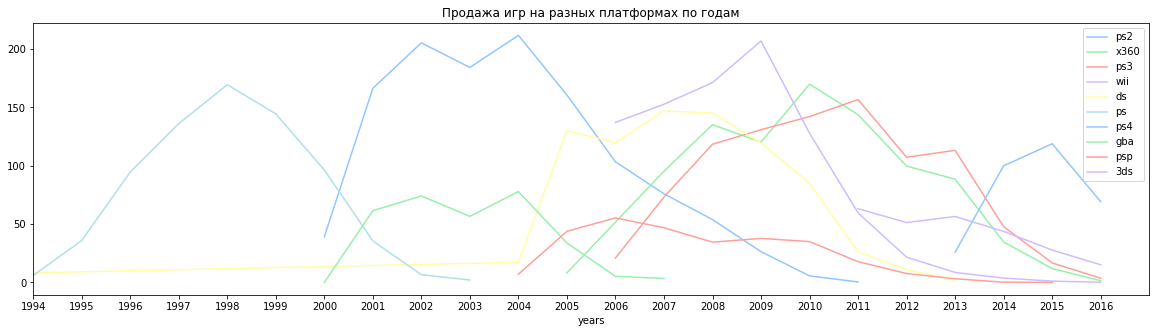

In [32]:
fig, ax = plt.subplots(figsize =(20,5))
for platform in platforms10:
    platforms10_by_years.loc[platform].plot('years','total_sales', ax=ax)
ax.legend(platforms10,prop = {'size':10})
ax.set_xlim([2000,2017])
ax.set_xticks(np.arange(1994,2017))
ax.set_xticklabels(range(1994,2017))
plt.title('Продажа игр на разных платформах по годам');

* На графике отражено рождение и смерть платформ. 
* Продолжительность жизни каждой - лет 10.
* Для нас актуальным периодом является интервал между 2013 и 2016 годом, т.к. в него входят все новые и актуальные платформы и нет ни одной устаревшей.

Возьмем данные за актуальный период, для этого выделим их в отдельный датафрейм:

In [33]:
df_actual = df.query('2013 <= year_of_release <= 2016') 

Посмотрим, что получилось:

In [34]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,71.0,7.5,rp,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,71.0,7.5,rp,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62


### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [35]:
df_actual_ptable = df_actual.pivot_table(index = ['year_of_release','platform'], values = 'total_sales', aggfunc = 'sum')

ptable_index = df_actual_ptable.index.to_list()

df_actual_ptable["years"] = [year for year, platform in ptable_index]
df_actual_ptable.index = [platform for year, platform in ptable_index]

In [36]:
df_actual_ptable

,total_sales,years
3ds,56.57,2013
ds,1.54,2013
pc,12.38,2013
ps3,113.25,2013
ps4,25.99,2013
psp,3.14,2013
psv,10.59,2013
wii,8.59,2013
wiiu,21.65,2013
x360,88.58,2013


Построим график:

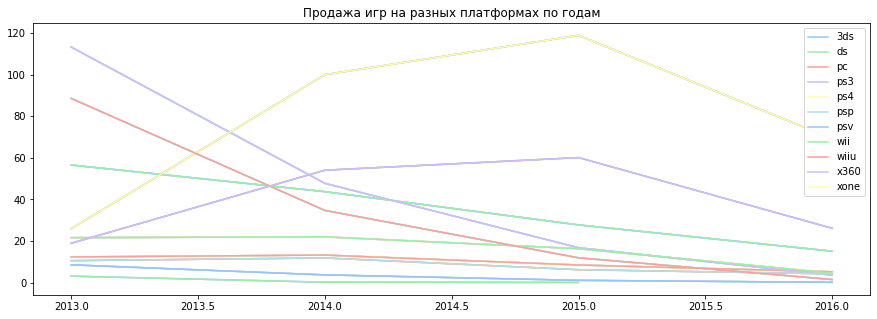

In [37]:
fig, ax = plt.subplots(figsize =(15,5))
for platform in df_actual_ptable.index:
    ax.plot(df_actual_ptable.loc[platform]['years'],
            df_actual_ptable.loc[platform]['total_sales'])
ax.legend(df_actual_ptable.index.unique(),prop = {'size':10})
plt.title('Продажа игр на разных платформах по годам');

* Мы наблюдаем, что к концу актуального периода все платформы или теряют в продажах или стагнируют. 
* Бодрый рост был лишь у ps4 и x360, но лишь до 2014 года. 
* Продажи игр для ps5 вызывают вопросы, т.к. эта платформа вышла <a href="https://ru.wikipedia.org/wiki/PlayStation_5">лишь в 2020 году.</a>
* Судя по нашим данным - потенциально прибыльными могут стать платформы apple и android, которых тут нет. 
* А из представленных -  x360, ps4 и pc, как надежную, всегда актуальную платформу.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишим результат.

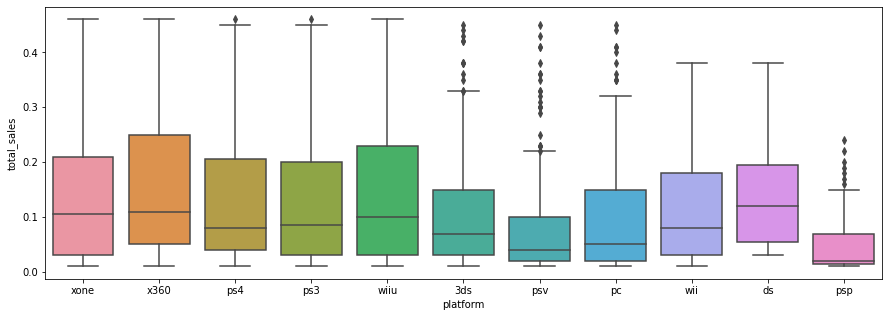

In [38]:
top_quartile = df_actual['total_sales'].quantile(0.75)
low_quartile = df_actual['total_sales'].quantile(0.25)
threshold = top_quartile + 2*low_quartile
fig, ax = plt.subplots(figsize =(15,5))
sns.boxplot(x = 'platform', y = 'total_sales', data = df_actual.query('total_sales <= @threshold'),ax=ax);

У платформ x360, ps4, ps3, wii, pc, psp большая часть значений больше медианного. Наиболее равномерно значения  распределены у платформ xone, ds.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Для исследования возьмем платформу ps4, как ведущую по продажам.


Посмотрим диаграмму рассеивания по плафторе ps4 и отзывам пользвателей

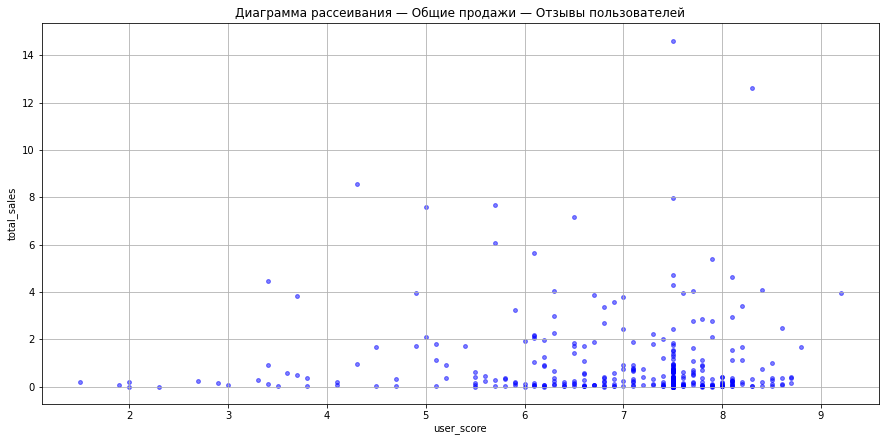

In [39]:
df_actual[df_actual['platform']=='ps4'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, subplots=True, figsize=(15,7), c='b', s = 15, grid=True)
plt.title('Диаграмма рассеивания — Общие продажи — Отзывы пользователей');


Посмотрим диаграмму рассеивания по плафторе ps4 и отзывам критиков:

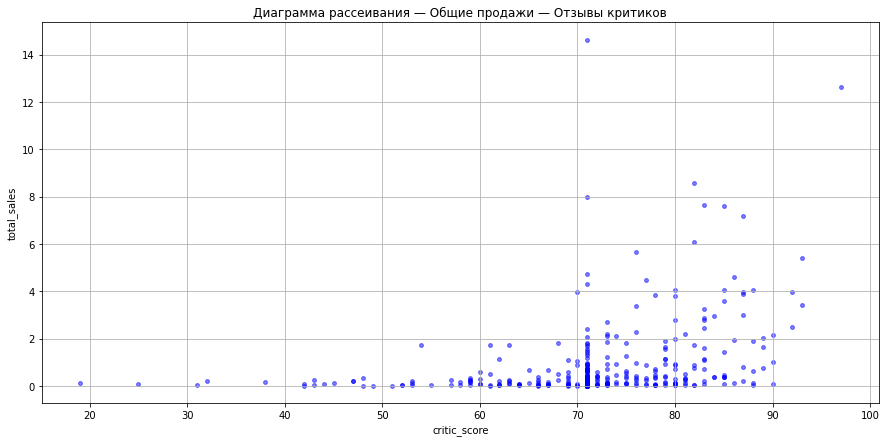

In [40]:
df_actual[df_actual['platform']=='ps4'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, subplots=True, figsize=(15,7), c='b', s = 15, grid=True)
plt.title('Диаграмма рассеивания — Общие продажи — Отзывы критиков');

Вычислим корреляцию между отзывами пользователей и общими продажами:

In [41]:
df_actual_ps4 = df_actual[df_actual['platform']=='ps4']
df_actual_ps4_user_cor = df_actual_ps4['user_score'].corr(df_actual_ps4['total_sales'])
display('Корреляция очень слабо отрицательная: {}'.format(df_actual_ps4_user_cor))

'Корреляция очень слабо отрицательная: -0.06275557891282788'

Вычислим корреляцию между отзывами критиков и общими продажами:

In [42]:
df_actual_ps4_critic_cor = df_actual_ps4['critic_score'].corr(df_actual_ps4['total_sales'])
display('Корреляция слабо положительная: {}'.format(df_actual_ps4_critic_cor))

'Корреляция слабо положительная: 0.3387064530024634'

#### Вывод

* Оценив соотношение отзывов покупателей, критиков и общими продажами можно сказать, что большую часть составляют высокие оценки. 
* Мы выяснили, что по данным из диаграммы рассеивания у нас:
 *  очень слабо отрицательная корреляция: **-** 0.06275557891282788 - по отзывам пользователей. Т.е. отзывы пользователей снижают продажи, даже при в целом хороших оценках. Или это пользователи склонны оставлять отзывы на не самых продаваемых играх.
 *  слабо положительная корреляция:  0.3387064530024634  - по отзывам критиков. Т.е. критики хорошо знают свою работу и при должном их стимулировании можно добиться повышения продаж.

### Соотнесем выводы с продажами игр на других платформах:

In [43]:
df_actual.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
ds,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
pc,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
ps3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
ps4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
psp,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
psv,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
wiiu,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


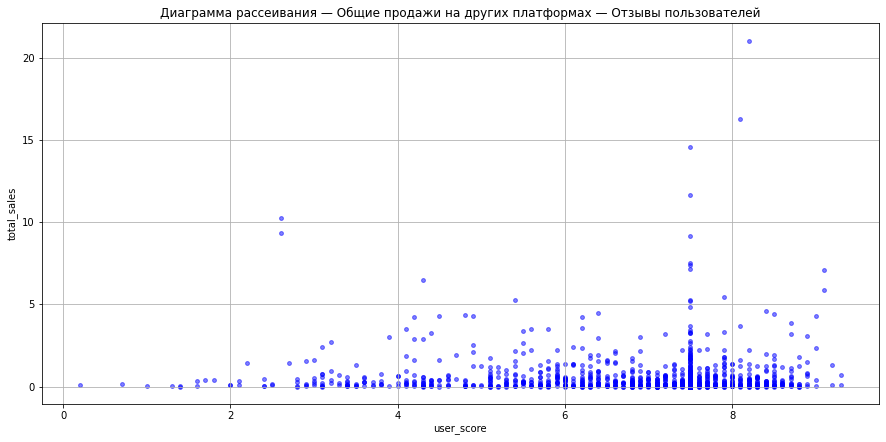

In [44]:
df_actual[df_actual['platform']!='ps4'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, subplots=True, figsize=(15,7), c='b', s = 15, grid=True)
plt.title('Диаграмма рассеивания — Общие продажи на других платформах — Отзывы пользователей');


Посмотрим диаграмму рассеивания на других плафтормах и отзывам пользвателей

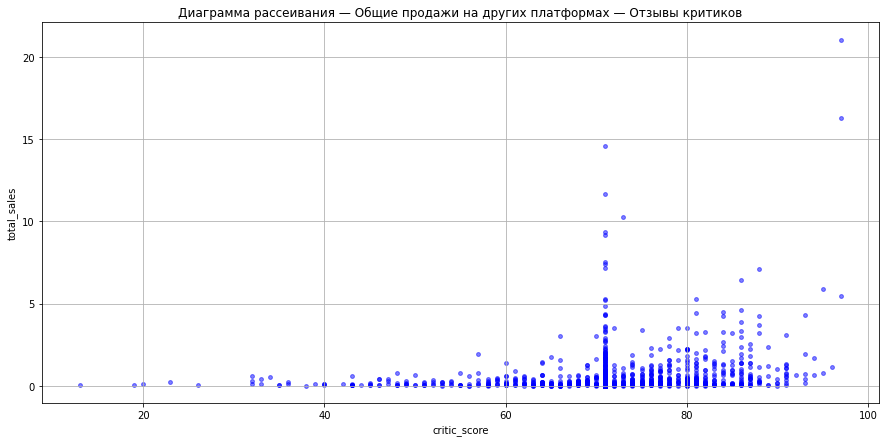

In [45]:
df_actual[df_actual['platform']!='ps4'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, subplots=True, figsize=(15,7), c='b', s = 15, grid=True)
plt.title('Диаграмма рассеивания — Общие продажи на других платформах — Отзывы критиков');

Вычислим корреляцию между отзывами пользователей на других платформах и общими продажами:

In [46]:
df_actual_not_ps4 = df_actual[df_actual['platform']!='ps4']
df_actual_not_ps4_user_cor = df_actual_not_ps4['user_score'].corr(df_actual_not_ps4['total_sales'])
display('Корреляция очень слабо отрицательная: {}'.format(df_actual_not_ps4_user_cor))

'Корреляция очень слабо отрицательная: -0.061861460311476074'

Вычислим корреляцию между отзывами критиков на других платформах и общими продажами:

In [47]:
df_actual_not_ps4_critic_cor = df_actual_not_ps4['critic_score'].corr(df_actual_not_ps4['total_sales'])
display('Корреляция слабо положительная: {}'.format(df_actual_not_ps4_critic_cor))

'Корреляция слабо положительная: 0.22609100395798937'

#### Выводы:

* Оценив соотношение отзывов покупателей, критиков и общими продажами игр на других плафторм можно сказать, что большую часть также составляют высокие оценки. 
* Мы выяснили, что по данным из диаграммы рассеивания у нас:
 *  очень слабо отирцательная корреляция: **-** 0.061861460311476074 - по отзывам пользователей на всех остальных платформах. Т.е. отзывы пользователей практически не влияют на продажи.
 *  слабо положительная корреляция: 0.22609100395798937  - по отзывам критиков. На других плафтормах критики по прежнему положительно влияют на продажи, но слабо.

## Посмотрим на общее распределение игр по жанрам.

Посмотрим популярность жанров на всех платформах за актуальный интервал:

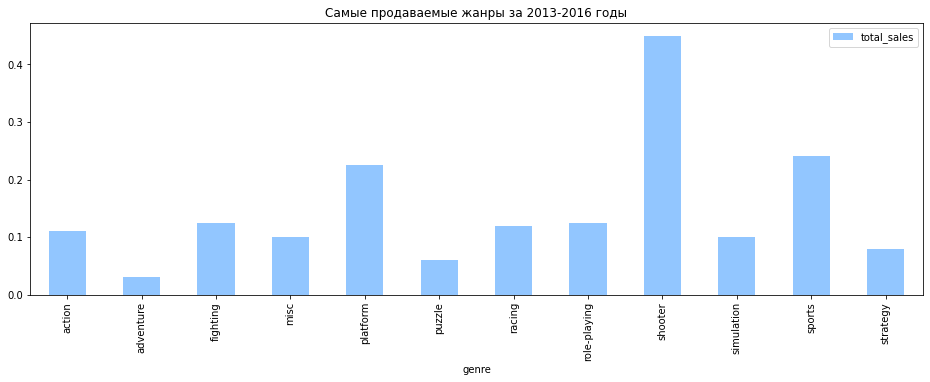

In [48]:

(
df_actual.pivot_table(index='genre', values='total_sales', aggfunc='median')
.plot(kind='bar', figsize=(16, 5))
)
plt.title('Самые продаваемые жанры за 2013-2016 годы');

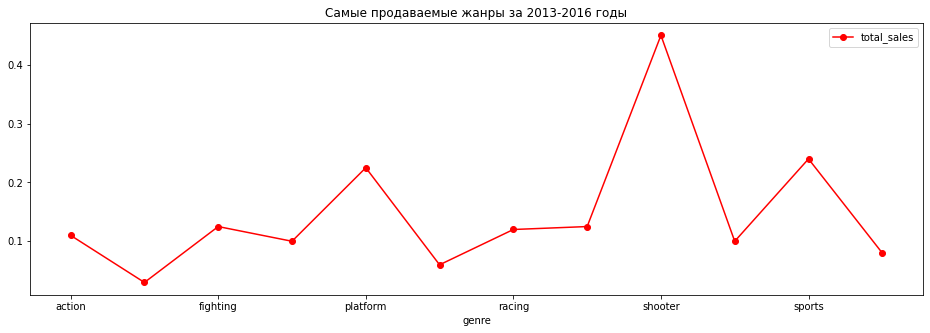

In [49]:
(
df_actual.pivot_table(index='genre', values='total_sales', aggfunc='median')
.plot(style='o-', figsize=(16, 5),  c='r')
)
plt.title('Самые продаваемые жанры за 2013-2016 годы');


Cамым популярным жанром являются шутеры, спортивные игры, платформеры, а наимении популярными являются квесты - adventure и головоломки.

##  Составим портрет пользователя каждого региона

Построим сводную таблицу по рейтингу для регионов NA, EU, JP

In [50]:
rating_ptable = df_actual.pivot_table(index = 'platform', values = ['na_sales','eu_sales', 'jp_sales'], aggfunc = ['sum'])

In [51]:
rating_ptable.columns = ['na_sales','eu_sales', 'jp_sales']

Составим рейтинг 5-ки самых популярных платформ для каждого региона

In [52]:
top5_na = rating_ptable.sort_values(by = 'na_sales', ascending = False).index[:5]
top5_eu = rating_ptable.sort_values(by = 'eu_sales', ascending = False).index[:5]
top5_jp = rating_ptable.sort_values(by = 'jp_sales', ascending = False).index[:5]

In [53]:
list_of_top = [top5_na, top5_eu, top5_jp]
for count,top in enumerate(list_of_top):
    if count == 0: 
        print('Топ платформ для сверо-американского региона:',*top)
    elif count == 1:
        print('Топ платформ для европейского региона:',*top)
    elif count == 2:
        print('Топ платформ для японского региона:',*top)
    print()
    for platform in top:
        data = rating_ptable.loc[platform,['na_sales','eu_sales', 'jp_sales']]
        if count == 0: 
            part = data['na_sales']
        elif count == 1:
            part = data['eu_sales']
        elif count == 2:
            part = data['jp_sales']
        ratio = part / sum(data)
        print('Рассмотрим платформу:', platform)
        print('Доля продаж:', ratio)
        print()

Топ платформ для сверо-американского региона: ps4 ps3 xone x360 3ds

Рассмотрим платформу: ps4
Доля продаж: 0.5308326122126494

Рассмотрим платформу: ps3
Доля продаж: 0.43844562265614906

Рассмотрим платформу: xone
Доля продаж: 0.355670458462599

Рассмотрим платформу: x360
Доля продаж: 0.3410056941214211

Рассмотрим платформу: 3ds
Доля продаж: 0.22603489815288028

Топ платформ для европейского региона: 3ds ps3 psv ps4 wiiu

Рассмотрим платформу: 3ds
Доля продаж: 0.4950719135577135

Рассмотрим платформу: ps3
Доля продаж: 0.15097633518686143

Рассмотрим платформу: psv
Доля продаж: 0.6252943155062242

Рассмотрим платформу: ps4
Доля продаж: 0.06004740584672089

Рассмотрим платформу: wiiu
Доля продаж: 0.18151484818151464

Топ платформ для японского региона: ps4 xone x360 ps3 3ds

Рассмотрим платформу: ps4
Доля продаж: 0.40911998194062954

Рассмотрим платформу: xone
Доля продаж: 0.6419855222337125

Рассмотрим платформу: x360
Доля продаж: 0.6549041623225601

Рассмотрим платформу: ps3
Доля про

Выделим лидирующий жанр

In [54]:
top_genre_ptable = df_actual.pivot_table(index = ['genre'], values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])
top_genre_ptable.columns = ['na_sales','jp_sales','eu_sales']
top5_genres_eu = top_genre_ptable.sort_values(by = 'eu_sales', ascending = False).index[:5]
top5_genres_jp = top_genre_ptable.sort_values(by = 'jp_sales', ascending = False).index[:5]
top5_genres_na = top_genre_ptable.sort_values(by = 'na_sales', ascending = False).index[:5]

print('Топ 5 самых популярных жанров в европейском регионе:',*top5_genres_eu)
print('Топ 5 самых популярных жанров в японском регионе:',*top5_genres_jp)
print('Топ 5 самых популярных жанров в северо авереканском регионе:',*top5_genres_na)

Топ 5 самых популярных жанров в европейском регионе: action shooter sports role-playing misc
Топ 5 самых популярных жанров в японском регионе: role-playing action misc fighting shooter
Топ 5 самых популярных жанров в северо авереканском регионе: action shooter sports role-playing racing


Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [55]:
esrb_ptable = df_actual.pivot_table(index = ['rating'], values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])
esrb_ptable

sum                  
       eu_sales jp_sales na_sales
rating                           
e         83.36    15.14    79.05
e10+      42.69     5.89    54.24
m        145.32    14.11   165.21
rp        78.91    85.05    89.42
t         41.95    20.59    49.79

* Рейтинг ESRB влияет на продажи в отдельных регионах. 
* Так у рейтинга 'е' основная доля продаж приходится на европейский регион, а в Японии продажи игры с этим рейтингом в 5 раз меньше.
* Игры для детей старше 10 лет в Японии не пользуются особой популярносью.
* А в Северной Америке наиболее популярными являются игры для взрослых ( May contain intense violence, blood and gore, sexual content, and strong language.)

## Проверка гипотез

### Проверим гипотезу "средние пользовательские рейтинги платформ Xbox One и PC одинаковые":
    


* **Н0:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* **H1:** Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [56]:
xone_var = st.variation(df_actual.query('platform == "xone"')['user_score'])
pc_var = st.variation(df_actual.query('platform == "pc"')['user_score'])
print('Равны ли дисперсии двух совокупностей?',(xone_var * 0.05 < abs(xone_var - pc_var)))

Равны ли дисперсии двух совокупностей? True


In [57]:
alpha = 0.05

result1 = st.ttest_ind(df_actual.query('platform == "xone"')['user_score'], 
                       df_actual.query('platform == "pc"')['user_score'])

prob1 = result1.pvalue
print('р-значение: ',prob1)
if prob1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  0.03921856828549636
Отвергаем нулевую гипотезу


#### Вывод

Проверка показала, что нулевая гипотеза не подтвердилась. Следовательно, средние пользовательские рейтинги платформ Xbox One и PC отличаются

### Проверим гипотезу "средние пользовательские рейтинги жанров Action и Sports разные."

* **Н0:** Cредние пользовательские рейтинги жанров Action и Sports одинаковые.
* **H1:** Cредние пользовательские рейтинги жанров Action и Sports разные.

In [58]:
action_var = st.variation(df_actual.query('genre == "action"')['user_score'])
sports_var = st.variation(df_actual.query('genre == "sports"')['user_score'])
print('Равны ли дисперсии двух совокупностей?',(((action_var * 0.05) < abs(action_var - sports_var))))

Равны ли дисперсии двух совокупностей? True


In [62]:
result2 = st.ttest_ind(df_actual.query('genre == "action"')['user_score'], 
                       df_actual.query('genre == "sports"')['user_score'])

prob2 = result2.pvalue
print('р-значение: ', prob2)
if prob2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  6.739248242461045e-42
Отвергаем нулевую гипотезу


#### Вывод

Проверка показала, что нулевая гипотеза не подтвердилась. Средние пользовательские рейтинги жанров Action и Sports разные.

## Вывод

Из проведенного анализы мы выяснили:
* Cамыми перспективными платформами на 2017 год являются x360, ps4 и pc (а лучше - android и apple).
* Cамыми популярными платформами на рынке в мире являются - PS4.
* Большинство предпочитает играть в шутеры. 
* Предпочтение жанров варьируется от региона. 
* Три самых популярных жанра одинаковы для Европы и США: action, shooter, sports, но отличаются для Японии:  role-playing,  action, misc.
* Самые популярные игры и в Европе и США относятся к категории ESRB для взрослых  - материалы игры не подходят для подростков младше 17 лет.
* Средние пользовательские рейтинги платформ Xbox One и PC отличаются
* Средние пользовательские рейтинги жанров Action и Sports разные.
